# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [23]:
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from api_keys import weather_api_key
from api_keys import g_key
import numpy as np
from citipy import citipy
from scipy.stats import linregress


## Generate Cities List

In [34]:
lat_range = (-90, 90)
lng_range = (-180, 180)
cities = []
lat_lngs = []
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:    
    city=citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name
    if city not in cities: 
        cities.append(city)
len(cities)



637

In [35]:
city

'kharp'

In [36]:

# Loop through the list of cities and perform a request for data on each
url = "http://api.openweathermap.org/data/2.5/weather?"

units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
weather_response = requests.get(query_url).json()
weather_response



{'coord': {'lon': 65.81, 'lat': 66.8},
 'weather': [{'id': 501,
   'main': 'Rain',
   'description': 'moderate rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 48.18,
  'feels_like': 40.68,
  'temp_min': 48.18,
  'temp_max': 48.18,
  'pressure': 998,
  'humidity': 93,
  'sea_level': 998,
  'grnd_level': 989},
 'visibility': 453,
 'wind': {'speed': 11.77, 'deg': 187},
 'rain': {'1h': 1.09},
 'clouds': {'all': 100},
 'dt': 1600109813,
 'sys': {'country': 'RU', 'sunrise': 1600044773, 'sunset': 1600092717},
 'timezone': 18000,
 'id': 1503726,
 'name': 'Kharp',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [37]:
name=[]
lat=[]
lon=[]
temp=[]
humid=[]
cloud=[]
wind=[]
country=[]
date=[]


for i,city in enumerate (cities):
    try:
        queryurl=f"{url}appid={weather_api_key}&q={city}&units={units}"
        response = requests.get(queryurl).json()
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except:
        pass
    print(i, city)
   

0 maloshuyka
1 vaini
2 veraval
3 coquimbo
4 bukachacha
5 bend
6 east london
7 saint-philippe
8 kavaratti
9 bethel
10 rikitea
11 vanavara
12 illoqqortoormiut
13 tanout
14 los llanos de aridane
15 esperance
16 tasiilaq
17 busselton
18 taolanaro
19 hilo
20 yarada
21 ebensee
22 torbay
23 zhanakorgan
24 moscow
25 geraldton
26 mataura
27 mar del plata
28 puerto ayora
29 linjiang
30 takoradi
31 cape town
32 katsuura
33 port elizabeth
34 sapouy
35 longyearbyen
36 dikson
37 hermanus
38 palana
39 bolungarvik
40 trastenik
41 pemangkat
42 fairbanks
43 cabo san lucas
44 nhulunbuy
45 leningradskiy
46 navahrudak
47 uribia
48 tottori
49 jarva-jaani
50 bathsheba
51 dingle
52 aklavik
53 ardistan
54 maputo
55 chkalovsk
56 souillac
57 bluff
58 barentsburg
59 amderma
60 sayhat
61 orikum
62 kapaa
63 solt
64 albany
65 labuhan
66 sao filipe
67 hobart
68 ushuaia
69 new norfolk
70 ufimskiy
71 georgetown
72 port hardy
73 hami
74 nome
75 waipawa
76 mehamn
77 wattegama
78 buin
79 samusu
80 the valley
81 tumannyy
8

624 winslow
625 baherden
626 valparaiso
627 ouango
628 cockburn harbour
629 zambezi
630 asfi
631 peterhead
632 carutapera
633 north myrtle beach
634 shatsk
635 khryashchevka
636 kharp


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [38]:
weather_df = pd.DataFrame({"City": name, "Lat": lat, "Lng": lon, "Max Temp": temp, "Humidity": humid, "Cloudiness": cloud, "Wind Speed": wind, "Country": country, "Date": date})
weather_df.to_csv("Weather_Output.csv")
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.20,-175.20,69.80,83,75,5.82,TO,1600109575
1,Verāval,20.90,70.37,81.23,85,71,8.68,IN,1600109820
2,Coquimbo,-29.95,-71.34,57.20,76,75,14.99,CL,1600109767
3,Bukachacha,52.98,116.92,38.86,89,0,0.43,RU,1600109820
4,Bend,44.06,-121.32,79.00,16,1,10.29,US,1600109753
...,...,...,...,...,...,...,...,...,...
578,Carutapera,-1.20,-46.02,82.92,71,100,10.80,BR,1600109941
579,North Myrtle Beach,33.82,-78.68,89.60,59,40,10.29,US,1600109936
580,Shatsk,54.03,41.71,52.27,90,85,13.15,RU,1600109942
581,Khryashchevka,53.81,49.09,57.20,67,0,8.95,RU,1600109942


In [39]:
trim_weather_df=weather_df[["Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Date"]]
trim_weather_df = trim_weather_df.aggregate(['count','mean','std','min', 'max'])
quat_weather=weather_df.quantile([.25, .5, .75])
merge_weather=pd.merge(trim_weather_df, quat_weather, how="outer")
merge_weather.index = ["count", "mean","std","min","max", "25%","50%","75%"]
merge_weather



,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,5.830000e+02
mean,19.960772,18.520240,67.300738,67.843911,48.430532,7.833087,1.600110e+09
std,33.615725,86.956917,15.684359,23.138712,40.483694,5.235172,9.008830e+01
min,-54.800000,-179.170000,29.390000,3.000000,0.000000,0.430000,1.600109e+09
max,78.220000,178.420000,106.270000,100.000000,100.000000,32.210000,1.600110e+09
25%,-9.730000,-54.255000,55.000000,53.500000,1.000000,4.015000,1.600110e+09
50%,26.490000,23.230000,68.940000,73.000000,40.000000,6.930000,1.600110e+09
75%,48.710000,90.930000,78.900000,87.000000,90.000000,10.290000,1.600110e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [40]:
#weather_df.loc[weather_df["Humidity"]== 100]
indices = weather_df[ weather_df["Humidity"]== 100 ].index


In [41]:
#  Get the indices of cities that have humidity over 100%.
indices

Int64Index([19, 21, 70, 78, 82, 91, 95, 108, 120, 166, 221, 266, 358, 381, 437,
            468, 569],
           dtype='int64')

In [42]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
new_weather_df=weather_df.drop(indices , inplace=False)
new_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.20,-175.20,69.80,83,75,5.82,TO,1600109575
1,Verāval,20.90,70.37,81.23,85,71,8.68,IN,1600109820
2,Coquimbo,-29.95,-71.34,57.20,76,75,14.99,CL,1600109767
3,Bukachacha,52.98,116.92,38.86,89,0,0.43,RU,1600109820
4,Bend,44.06,-121.32,79.00,16,1,10.29,US,1600109753
...,...,...,...,...,...,...,...,...,...
578,Carutapera,-1.20,-46.02,82.92,71,100,10.80,BR,1600109941
579,North Myrtle Beach,33.82,-78.68,89.60,59,40,10.29,US,1600109936
580,Shatsk,54.03,41.71,52.27,90,85,13.15,RU,1600109942
581,Khryashchevka,53.81,49.09,57.20,67,0,8.95,RU,1600109942


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

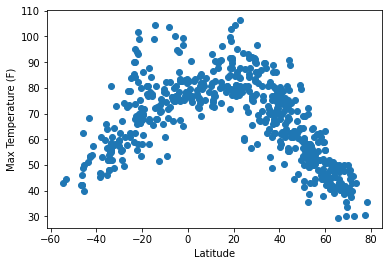

In [43]:
x_values = new_weather_df['Lat']
y_values = new_weather_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

## Latitude vs. Humidity Plot

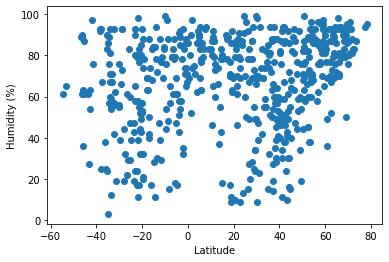

In [44]:
x_values = new_weather_df['Lat']
y_values = new_weather_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

## Latitude vs. Cloudiness Plot

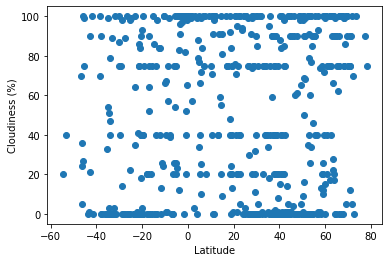

In [45]:
x_values = new_weather_df['Lat']
y_values = new_weather_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

## Latitude vs. Wind Speed Plot

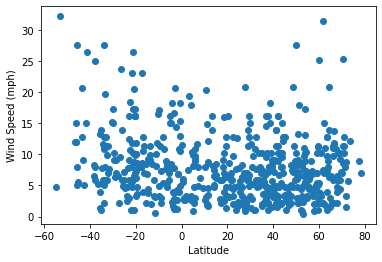

In [46]:
x_values = new_weather_df['Lat']
y_values = new_weather_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

## Linear Regression

In [59]:
lat_n = new_weather_df[ new_weather_df["Lat"]>= 0 ]
lat_n

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Verāval,20.90,70.37,81.23,85,71,8.68,IN,1600109820
3,Bukachacha,52.98,116.92,38.86,89,0,0.43,RU,1600109820
4,Bend,44.06,-121.32,79.00,16,1,10.29,US,1600109753
7,Kavaratti,10.57,72.64,81.79,80,100,20.33,IN,1600109821
8,Bethel,41.37,-73.41,73.99,49,20,13.87,US,1600109614
...,...,...,...,...,...,...,...,...,...
577,Peterhead,57.51,-1.80,62.60,77,74,3.36,GB,1600109941
579,North Myrtle Beach,33.82,-78.68,89.60,59,40,10.29,US,1600109936
580,Shatsk,54.03,41.71,52.27,90,85,13.15,RU,1600109942
581,Khryashchevka,53.81,49.09,57.20,67,0,8.95,RU,1600109942


In [60]:
lat_S=new_weather_df[new_weather_df["Lat"]< 0 ]
lat_S

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.20,-175.20,69.80,83,75,5.82,TO,1600109575
2,Coquimbo,-29.95,-71.34,57.20,76,75,14.99,CL,1600109767
5,East London,-33.02,27.91,57.20,67,0,11.41,ZA,1600109741
6,Saint-Philippe,-21.36,55.77,66.20,55,75,26.40,RE,1600109757
9,Rikitea,-23.12,-134.97,73.58,80,0,12.41,PF,1600109747
...,...,...,...,...,...,...,...,...,...
551,San Borja,-14.82,-66.85,98.98,28,86,3.87,BO,1600109935
562,Papara,-3.98,-38.73,86.00,58,100,18.34,BR,1600109938
573,Valparaíso,-33.04,-71.63,60.80,55,0,12.75,CL,1600109940
575,Zambezi,-13.54,23.10,72.57,30,0,2.01,ZM,1600109941


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6670014632256004
y = -0.7x + 94.66


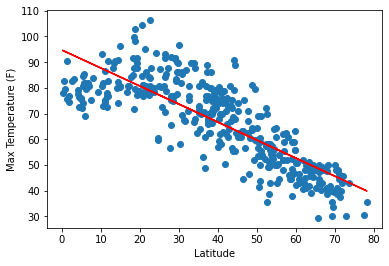

In [65]:
x_values = lat_n['Lat']
y_values = lat_n['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4764816055243294
y = 0.75x + 84.93


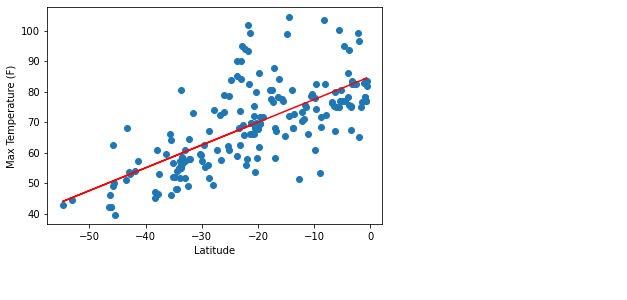

In [64]:
x_values = lat_S['Lat']
y_values = lat_S['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.02543097984786347
y = 0.18x + 62.48


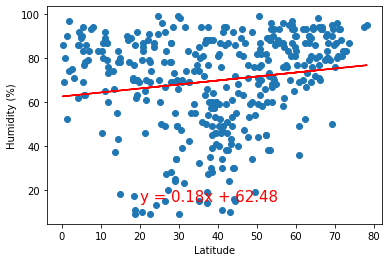

In [68]:
x_values = lat_n['Lat']
y_values = lat_n['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0021329687128864606
y = 0.08x + 62.89


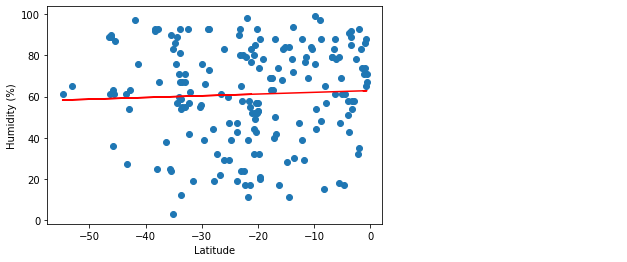

In [71]:
x_values = lat_S['Lat']
y_values = lat_S['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0006207332935744564
y = -0.05x + 53.02


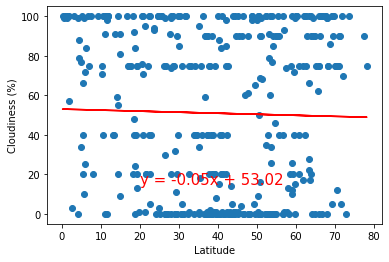

In [73]:
x_values = lat_n['Lat']
y_values = lat_n['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.05752906851973195
y = 0.74x + 57.38


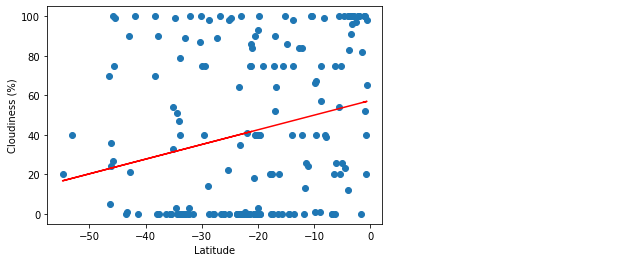

In [72]:
x_values = lat_S['Lat']
y_values = lat_S['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.00448061451971662
y = 0.02x + 6.43


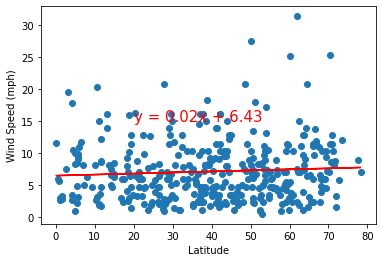

In [75]:
x_values = lat_n['Lat']
y_values = lat_n['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0371830249801371
y = -0.09x + 7.57


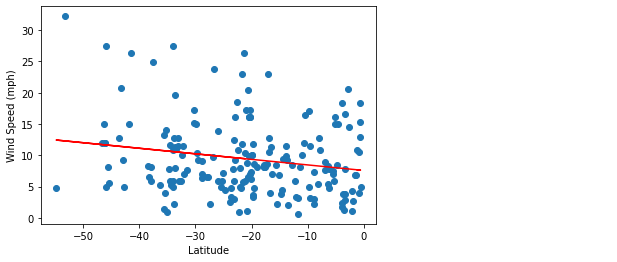

In [77]:
x_values = lat_S['Lat']
y_values = lat_S['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()